In [1]:
cd ..

/Users/muhammadfarooq/Codebase/thesis-experiment/Pith2Bark


In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from src.winner import winner_model_rings
from src.damage import merge_df
from src.damage import read_damage_min_max
from src.damage import read_damage_mean

# Damage Dataset

In [3]:
mse_url = "output/ringsranking_mse_sixteen.csv"
rings_url = "output/ringsranking_rings_sixteen.csv"
df_ringsranking_sixteen = winner_model_rings(mse_url, rings_url)

mse_url = "output/ringsranking_mse_thirtytwo.csv"
rings_url = "output/ringsranking_rings_thirtytwo.csv"
df_ringsranking_thirtytwo = winner_model_rings(mse_url, rings_url)

Polar Pith Canny(blur otsu) 12.829318845239923 (subseq)
Polar Pith Canny(blur otsu) 12.88055458721076 (subseq)


In [4]:
mse_url = "output/pine_mse_sixteen.csv"
rings_url = "output/pine_rings_sixteen.csv"
df_pine_sixteen = winner_model_rings(mse_url, rings_url)

mse_url = "output/pine_mse_thirtytwo.csv"
rings_url = "output/pine_rings_thirtytwo.csv"
df_pine_thirtytwo = winner_model_rings(mse_url, rings_url)

Polar Pith Canny(blur triangle) 19.888455438324574 (peaks)
Polar Pith Canny(blur triangle) 19.591747084408897 (peaks)


In [5]:
mse_url = "output/fur_mse_sixteen.csv"
rings_url = "output/fur_rings_sixteen.csv"
df_fur_sixteen = winner_model_rings(mse_url, rings_url)

mse_url = "output/fur_mse_thirtytwo.csv"
rings_url = "output/fur_rings_thirtytwo.csv"
df_fur_thirtytwo = winner_model_rings(mse_url, rings_url)

Polar Pith Canny(blur triangle) 13.428984012468806 (peaks)
Polar Pith Canny(blur triangle) 13.688767879960144 (peaks)


In [6]:
mse_url = "output/tracy_mse_sixteen.csv"
rings_url = "output/tracy_rings_sixteen.csv"
df_tracy_sixteen = winner_model_rings(mse_url, rings_url)

mse_url = "output/tracy_mse_thirtytwo.csv"
rings_url = "output/tracy_rings_thirtytwo.csv"
df_tracy_thirtytwo = winner_model_rings(mse_url, rings_url)

Polar Canny(triangle) 39.683736416974455 (peaks)
Polar Pith Canny(triangle) 39.48914666858598 (peaks)


In [7]:
mse_url = "output/data_mse_sixteen.csv"
rings_url = "output/data_rings_sixteen.csv"
df_data_sixteen = winner_model_rings(mse_url, rings_url)

mse_url = "output/data_mse_thirtytwo.csv"
rings_url = "output/data_rings_thirtytwo.csv"
df_data_thirtytwo = winner_model_rings(mse_url, rings_url)

Canny(triangle) 18.789996216404624 (subseq)
Canny(triangle) 18.871624925897343 (subseq)


In [8]:
#damage
damage_sixteen_url = "damage/damage_sixteen.csv"
damage_thirtytwo_url = "damage/damage_thirtytwo.csv"

#merge
df_merge_sixteen = merge_df(df_ringsranking_sixteen, df_pine_sixteen, df_fur_sixteen, df_tracy_sixteen, df_data_sixteen)
df_merge_thirtytwo = merge_df(df_ringsranking_thirtytwo, df_pine_thirtytwo, df_fur_thirtytwo, df_tracy_thirtytwo, df_data_thirtytwo)

df_damage_sixteen_min_max = read_damage_min_max(damage_sixteen_url, df_merge_sixteen)
df_damage_thirtytwo_min_max = read_damage_min_max(damage_thirtytwo_url, df_merge_thirtytwo)

df_damage_sixteen_mean = read_damage_mean(damage_sixteen_url, df_merge_sixteen)
df_damage_thirtytwo_mean = read_damage_mean(damage_thirtytwo_url, df_merge_thirtytwo)

In [9]:
#df_damage_sixteen_min_max

In [10]:
#df_damage_thirtytwo_min_max

In [11]:
#df_damage_sixteen_mean

In [12]:
#df_damage_thirtytwo_mean

In [13]:
#STOP

# Config

In [14]:
# Using 3-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

columns = ['image', 'algo']
training_percent = 0.9

# create pipeline
LR_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])
GNB_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', GaussianNB())])
MNB_pipeline = Pipeline(steps=[('model', MultinomialNB())])
LDA_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearDiscriminantAnalysis())])
KNN_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', KNeighborsClassifier())])
DTC_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', DecisionTreeClassifier())])
RFC_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', RandomForestClassifier())])
SVC_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [15]:
accuracy_sixteen_min_max = []
accuracy_thirtytwo_min_max = []
accuracy_sixteen_mean = []
accuracy_thirtytwo_mean = []

In [16]:
def evaluate_model(pipeline, _X, _y, _cv=kf):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    
    nmse_scores = cross_val_score(estimator=pipeline, X=_X, y=_y, scoring='neg_mean_squared_error', cv=_cv)
    accuracy_scores = cross_val_score(estimator=pipeline, X=_X, y=_y, scoring='accuracy', cv=_cv)
    cv_scores = cross_validate(estimator=pipeline, X=_X, y=_y, cv=_cv, return_estimator=True) #scoring=_scoring, return_estimator=True, return_train_score=True
    cv_test_scores = cv_scores['test_score']
    
    #print(f'Scores for each fold are: {nmse_scores}')
    #print(f'Average score: {"{:.2f}".format(nmse_scores.mean())}')

    #print(f'Scores for each fold are: {accuracy_scores}')
    #print(f'Average score: {"{:.2f}".format(accuracy_scores.mean())}')

    #print(f'Scores for each fold are: {cv_test_scores}')
    #print(f'Average score: {"{:.2f}".format(cv_test_scores.mean())}')
    
    return accuracy_scores.mean()

In [17]:
def plot_accuracy(title, data):
    models = list(data.keys())
    performance = list(data.values())

    fig = plt.figure(figsize = (14, 10))

    plt.bar(models, performance, color ='maroon', width = 0.4)

    plt.text(0, performance[0] + 0.01, performance[0], ha='center', fontsize=12)
    plt.text(1, performance[1] + 0.01, performance[1], ha='center', fontsize=12)
    plt.text(2, performance[2] + 0.01, performance[2], ha='center', fontsize=12)
    plt.text(3, performance[3] + 0.01, performance[3], ha='center', fontsize=12)
    plt.text(4, performance[4] + 0.01, performance[4], ha='center', fontsize=12)
    plt.text(5, performance[5] + 0.01, performance[5], ha='center', fontsize=12)
    plt.text(6, performance[6] + 0.01, performance[6], ha='center', fontsize=12)
    plt.text(7, performance[6] + 0.01, performance[6], ha='center', fontsize=12)

    plt.title(title)
    plt.show()

# MinMax

## 16

In [18]:
df = df_damage_sixteen_min_max
X = df.drop(columns=columns)
y = df[["Damage"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=training_percent)

In [19]:
acc = evaluate_model(LR_pipeline, X_train, y_train)
accuracy_sixteen_min_max.append(round(acc, 2))

In [20]:
acc = evaluate_model(GNB_pipeline, X_train, y_train)
accuracy_sixteen_min_max.append(round(acc, 2))

In [21]:
acc = evaluate_model(MNB_pipeline, X_train, y_train)
accuracy_sixteen_min_max.append(round(acc, 2))

In [22]:
acc = evaluate_model(LDA_pipeline, X_train, y_train)
accuracy_sixteen_min_max.append(round(acc, 2))

In [23]:
acc = evaluate_model(KNN_pipeline, X_train, y_train)
accuracy_sixteen_min_max.append(round(acc, 2))

In [24]:
acc = evaluate_model(DTC_pipeline, X_train, y_train)
accuracy_sixteen_min_max.append(round(acc, 2))

In [25]:
acc = evaluate_model(RFC_pipeline, X_train, y_train)
accuracy_sixteen_min_max.append(round(acc, 2))

In [26]:
acc = evaluate_model(SVC_pipeline, X_train, y_train)
accuracy_sixteen_min_max.append(round(acc, 2))

In [27]:
#STOP

## 32

In [28]:
df = df_damage_thirtytwo_min_max
X = df.drop(columns=columns)
y = df[["Damage"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=training_percent)

In [29]:
acc = evaluate_model(LR_pipeline, X_train, y_train)
accuracy_thirtytwo_min_max.append(round(acc, 2))

In [30]:
acc = evaluate_model(GNB_pipeline, X_train, y_train)
accuracy_thirtytwo_min_max.append(round(acc, 2))

In [31]:
acc = evaluate_model(MNB_pipeline, X_train, y_train)
accuracy_thirtytwo_min_max.append(round(acc, 2))

In [32]:
acc = evaluate_model(LDA_pipeline, X_train, y_train)
accuracy_thirtytwo_min_max.append(round(acc, 2))

In [33]:
acc = evaluate_model(KNN_pipeline, X_train, y_train)
accuracy_thirtytwo_min_max.append(round(acc, 2))

In [34]:
acc = evaluate_model(DTC_pipeline, X_train, y_train)
accuracy_thirtytwo_min_max.append(round(acc, 2))

In [35]:
acc = evaluate_model(RFC_pipeline, X_train, y_train)
accuracy_thirtytwo_min_max.append(round(acc, 2))

In [36]:
acc = evaluate_model(SVC_pipeline, X_train, y_train)
accuracy_thirtytwo_min_max.append(round(acc, 2))

In [37]:
#STOP

# Mean

## 16

In [38]:
df = df_damage_sixteen_mean
X = df.drop(columns=columns)
y = df[["Damage"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=training_percent)

In [39]:
acc = evaluate_model(LR_pipeline, X_train, y_train)
accuracy_sixteen_mean.append(round(acc, 2))

In [40]:
acc = evaluate_model(GNB_pipeline, X_train, y_train)
accuracy_sixteen_mean.append(round(acc, 2))

In [41]:
acc = evaluate_model(MNB_pipeline, X_train, y_train)
accuracy_sixteen_mean.append(round(acc, 2))

In [42]:
acc = evaluate_model(LDA_pipeline, X_train, y_train)
accuracy_sixteen_mean.append(round(acc, 2))

In [43]:
acc = evaluate_model(KNN_pipeline, X_train, y_train)
accuracy_sixteen_mean.append(round(acc, 2))

In [44]:
acc = evaluate_model(DTC_pipeline, X_train, y_train)
accuracy_sixteen_mean.append(round(acc, 2))

In [45]:
acc = evaluate_model(RFC_pipeline, X_train, y_train)
accuracy_sixteen_mean.append(round(acc, 2))

In [46]:
acc = evaluate_model(SVC_pipeline, X_train, y_train)
accuracy_sixteen_mean.append(round(acc, 2))

In [47]:
#STOP

## 32

In [48]:
df = df_damage_thirtytwo_mean
X = df.drop(columns=columns)
y = df[["Damage"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=training_percent)

In [49]:
acc = evaluate_model(LR_pipeline, X_train, y_train)
accuracy_thirtytwo_mean.append(round(acc, 2))

In [50]:
acc = evaluate_model(GNB_pipeline, X_train, y_train)
accuracy_thirtytwo_mean.append(round(acc, 2))

In [51]:
acc = evaluate_model(MNB_pipeline, X_train, y_train)
accuracy_thirtytwo_mean.append(round(acc, 2))

In [52]:
acc = evaluate_model(LDA_pipeline, X_train, y_train)
accuracy_thirtytwo_mean.append(round(acc, 2))

In [53]:
acc = evaluate_model(KNN_pipeline, X_train, y_train)
accuracy_thirtytwo_mean.append(round(acc, 2))

In [54]:
acc = evaluate_model(DTC_pipeline, X_train, y_train)
accuracy_thirtytwo_mean.append(round(acc, 2))

In [55]:
acc = evaluate_model(RFC_pipeline, X_train, y_train)
accuracy_thirtytwo_mean.append(round(acc, 2))

In [56]:
acc = evaluate_model(SVC_pipeline, X_train, y_train)
accuracy_thirtytwo_mean.append(round(acc, 2))

In [57]:
#STOP

# Performance

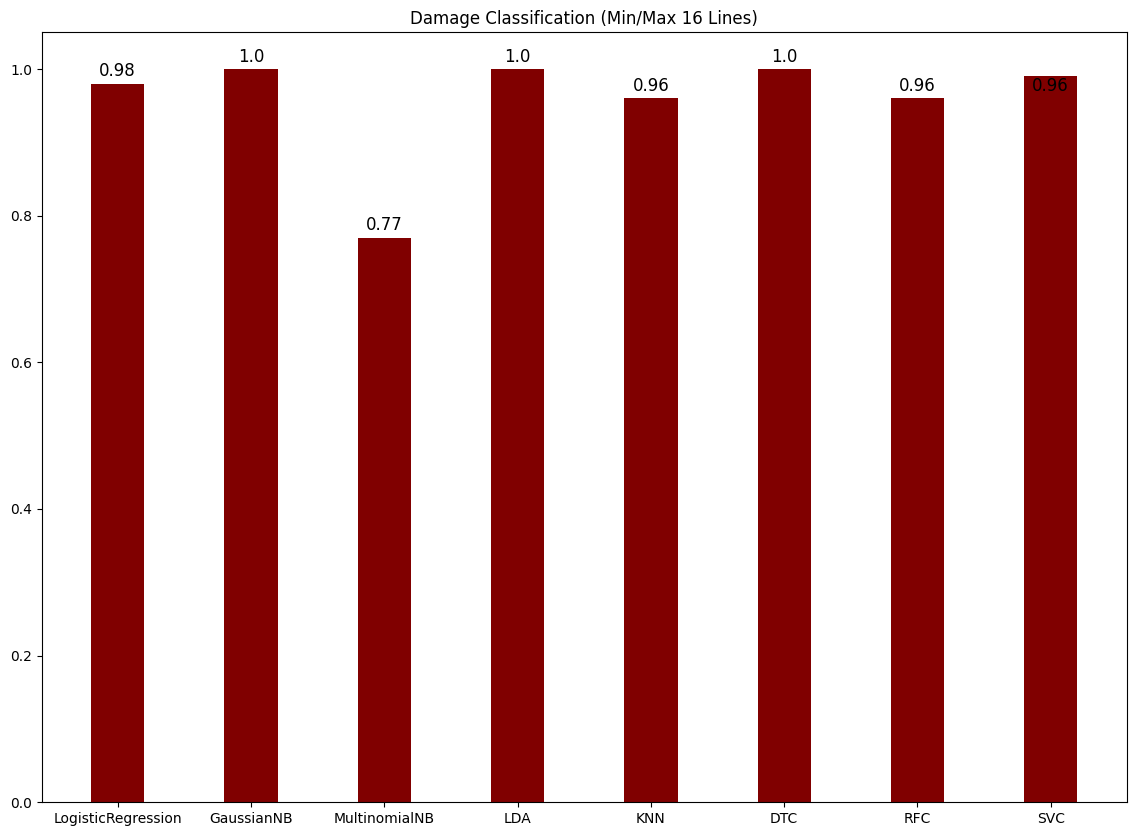

In [58]:
data = {'LogisticRegression':accuracy_sixteen_min_max[0], 'GaussianNB':accuracy_sixteen_min_max[1],
        'MultinomialNB':accuracy_sixteen_min_max[2], 'LDA':accuracy_sixteen_min_max[3],
        'KNN':accuracy_sixteen_min_max[4], 'DTC':accuracy_sixteen_min_max[5], 'RFC':accuracy_sixteen_min_max[6],
       'SVC':accuracy_sixteen_min_max[7]}

plot_accuracy("Damage Classification (Min/Max 16 Lines)", data)

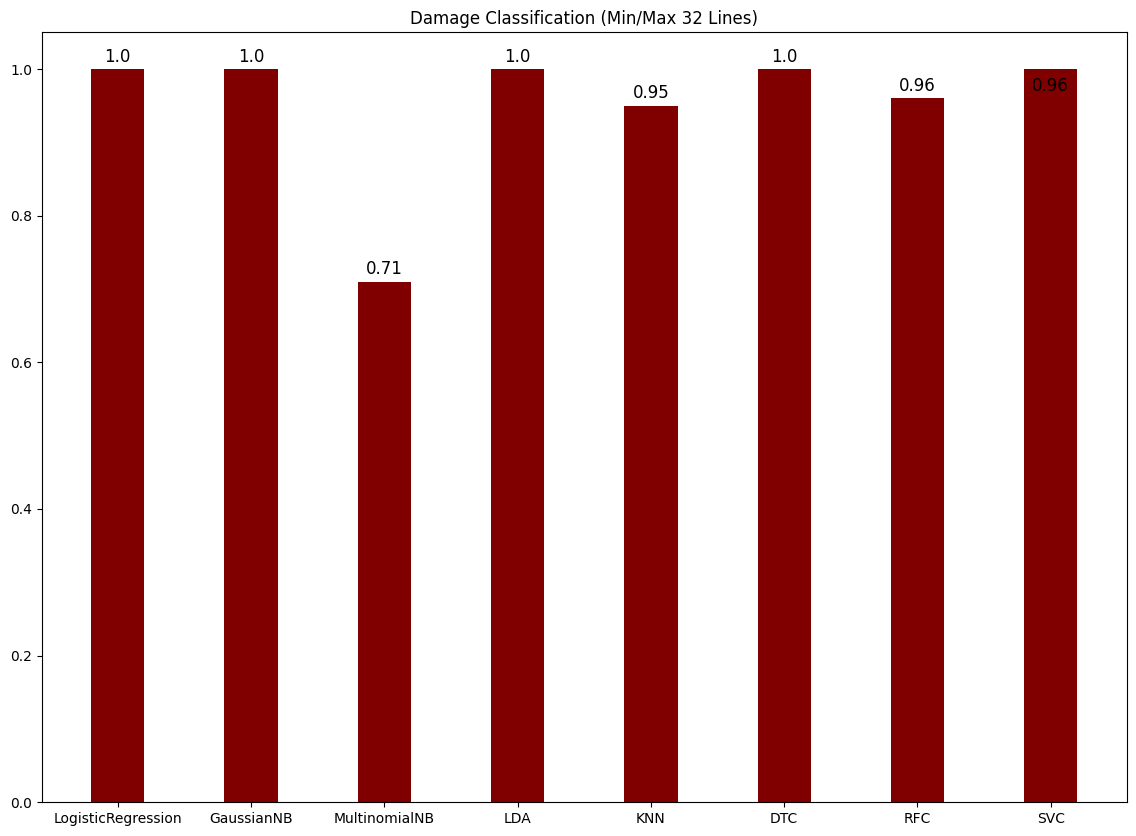

In [59]:
data = {'LogisticRegression':accuracy_thirtytwo_min_max[0], 'GaussianNB':accuracy_thirtytwo_min_max[1],
        'MultinomialNB':accuracy_thirtytwo_min_max[2], 'LDA':accuracy_thirtytwo_min_max[3],
        'KNN':accuracy_thirtytwo_min_max[4], 'DTC':accuracy_thirtytwo_min_max[5], 'RFC':accuracy_thirtytwo_min_max[6],
       'SVC':accuracy_thirtytwo_min_max[7]}

plot_accuracy("Damage Classification (Min/Max 32 Lines)", data)

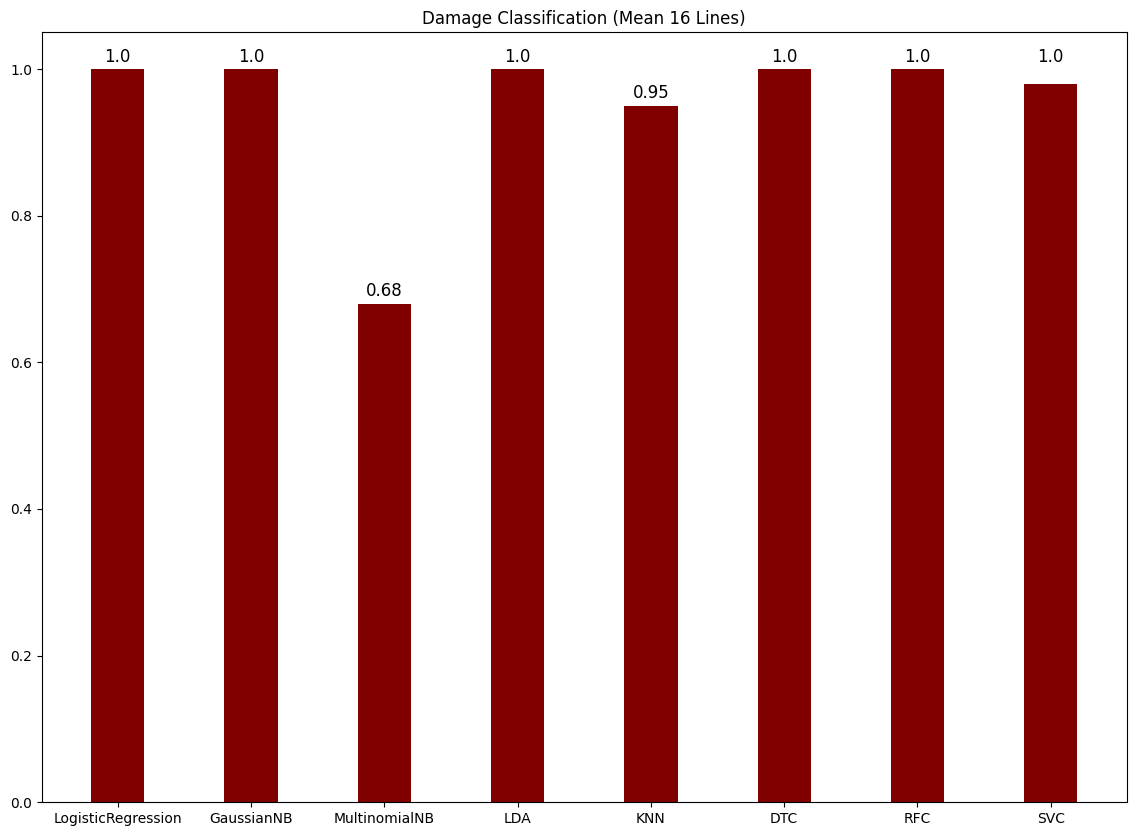

In [60]:
data = {'LogisticRegression':accuracy_sixteen_mean[0], 'GaussianNB':accuracy_sixteen_mean[1],
        'MultinomialNB':accuracy_sixteen_mean[2], 'LDA':accuracy_sixteen_mean[3],
        'KNN':accuracy_sixteen_mean[4], 'DTC':accuracy_sixteen_mean[5], 'RFC':accuracy_sixteen_mean[6],
        'SVC':accuracy_sixteen_mean[7]}

plot_accuracy("Damage Classification (Mean 16 Lines)", data)

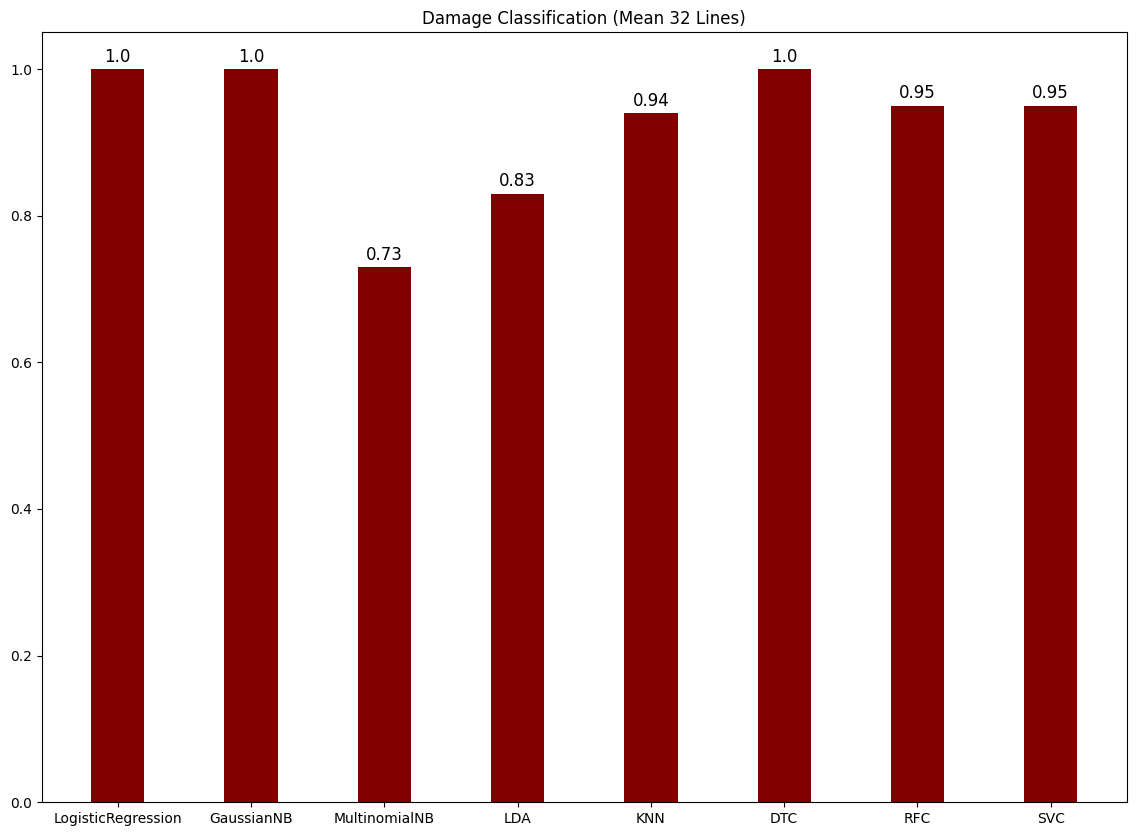

In [61]:
data = {'LogisticRegression':accuracy_thirtytwo_mean[0], 'GaussianNB':accuracy_thirtytwo_mean[1],
        'MultinomialNB':accuracy_thirtytwo_mean[2], 'LDA':accuracy_thirtytwo_mean[3],
        'KNN':accuracy_thirtytwo_mean[4], 'DTC':accuracy_thirtytwo_mean[5], 'RFC':accuracy_thirtytwo_mean[6],
        'SVC':accuracy_thirtytwo_mean[7]}

plot_accuracy("Damage Classification (Mean 32 Lines)", data)

In [62]:
#STOP